<div class="alert alert-block alert-success">
    <h1 align="center">Product Recommendations - using word2vec</h1>
    <h3 align="center">Recommender System</h3>
    
<a href="https://www.kaggle.com/datasets/yukafimazid/online-retail/data">
Click for more information for dataset
    </a>
</div>

<img src="https://online.abertay.ac.uk/wp-content/uploads/2023/06/recommender-systems.jpg" />


<div style="
    background-color:#e6f9e6;
    border-left:6px solid #4caf50;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Welcome to the Notebook...! 
    </p>
    <p style="margin-bottom:10px;text-align:justify;">    
This notebook creates a simple product recommendation system using the popular Online Retail dataset and Word2Vec: by treating customer purchases (invoices) as sentences and products as words, we learn which items are often bought together and suggest similar or complementary products to customers.
    </p>
</div>






<div style="
    background-color:#e6f9e6;
    border-left:6px solid #4caf50;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        What is Word2Vec and How Can It Be Used for Product Recommendations?
    </p>
    <p style="margin-bottom:10px;text-align:justify;">
       Word2Vec is a groundbreaking technique in Natural Language Processing (NLP) based on a simple but powerful idea: the meaning of a word can be understood from its context — the words that frequently appear before and after it. Since text is essentially a sequence of words, Word2Vec learns to represent each word as a dense numerical vector (embedding) such that words with similar contexts end up with similar vectors.
    </p>
    <p style="margin-bottom:10px;text-align:justify;">
This approach revolutionized NLP by providing much richer and more meaningful word representations than previous methods.
    </p>
        <p style="margin-bottom:10px;text-align:justify;">
The same core idea can be applied beyond text — to recommendation systems — in what is often called Prod2Vec or Item2Vec.
    </p>
        <p style="margin-bottom:10px;text-align:justify;">
In e-commerce or any platform with user-item interactions, we can treat user behavior (such as items bought together in the same transaction or viewed in the same session) as "sentences" and individual items (products, listings, ads, etc.) as "words". If two items frequently appear together, Word2Vec will learn to place them close to each other in the vector space, naturally capturing hidden relationships like complementarity, similarity in style, or shared use cases — without any manual feature engineering.
    </p>
    <p style="font-weight:bold;margin-bottom:10px;">
        Real-world examples:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
            Airbnb applied this technique to their listing embeddings. They treated a user's browsing session as a sentence and each viewed listing as a word. This allowed them to build a highly effective "Similar Listings" feature, resulting in a 21% increase in click-through rate (CTR) on that carousel — a component that, together with search ranking, drives 99% of bookings.
        </li>
           <li>
               Yahoo used a similar approach for advertisement recommendations based on user email activity and saw a 9% lift in CTR.
        </li>
    </ul>
        <p style="margin-bottom:10px;text-align:justify;">
In this notebook, we apply exactly the same concept to the well-known Online Retail dataset. We treat each invoice (or customer purchase history) as a "sentence" and each product (identified by StockCode) as a "word". By training a Word2Vec model on these sequences, we create product embeddings that enable us to recommend items that are frequently bought together or are similar in customer preferences — building a simple yet powerful recommendation system.
    </p>    
</div>

<div style="background-color:#e6f9e6;border-left:6px solid #4caf50;padding:15px 20px;border-radius:8px;margin:15px 0;font-size:16px;line-height:1.5;">
    <p style="font-weight:bold;margin-bottom:10px;">
        Topics:
    </p>
    <ul style="margin:0;padding-left:20px;">
        <li>Import the Dataset (Online Retail)</li>
        <li>Exploratory Data Analysis + Visualization</li>
        <li>Data Cleaning</li>
        <li>Preprocessing (Handling Missing Values, Encoding data, Scale & Cross-validation)</li>
        <li>Model building, performance evaluation</li>
        <li>Conclusion</li>
    </ul>
</div>

<div style="background-color:#e6f9e6;border-left:6px solid #4caf50;padding:15px 20px;border-radius:8px;margin:15px 0;font-size:16px;line-height:1.5;">
    <p style="font-weight:bold;margin-bottom:10px;">
        1. Load Libraries + Dataset
    </p>
</div>

In [6]:
#pip install umap-learn

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import random
from tqdm.notebook import tqdm
#---
from gensim.models import Word2Vec
#---
import umap
#---
import warnings;
warnings.filterwarnings('ignore')
#---
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '-1'
#---
data = pd.read_excel('/kaggle/input/Online Retail.xlsx')

In [8]:
#set color
class color:
    BLUE = '\033[94m'
    GREEN = '\033[32m'
    BRIGHT_GREEN = '\033[92m'
    YELLOW = '\033[33m'
    BRIGHT_YELLOW = '\033[93m'
    RED = '\033[31m'
    BRIGHT_RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    BROWN = '\033[33m'
    DARK_BROWN = '\033[1;33m'
    END = '\033[0m'

<div style="background-color:#e6f9e6;border-left:6px solid #4caf50;padding:15px 20px;border-radius:8px;margin:15px 0;font-size:16px;line-height:1.5;">
    <p style="font-weight:bold;margin-bottom:10px;">
        1-1. Data Overview
    </p>
</div>

In [9]:
def df_details(dataset=None):
    column = []
    dtype = []
    unique = []
    count = []
    missing = []
    missing_perecent =[]
    mean_ = []
    std_ = []
    min_ = []
    max_ = []
    skew_ = []
    for col in data.columns:
        column.append(col)
        dtype.append(data[col].dtype)
        unique.append(len(data[col].unique()))
        count.append(len(data[col]))
        missing.append(data[col].isna().sum())
        missing_perecent.append(round((data[col].isna().sum()/len(data))*100, 2))
        if data[col].dtype =='int' or data[col].dtype =='float':
            mean_.append(data[col].mean())
            std_.append(data[col].std())
            min_.append(data[col].min())
            max_.append(data[col].max())
            skew_.append(round(data[col].skew()))
        else:
            mean_.append(0)
            std_.append(0)
            min_.append(0)
            max_.append(0)
            skew_.append(0)
    data_info = pd.DataFrame({'Feature':column,
                                 'Dtype':dtype,
                                 'Unique':unique,
                                 'Count':count,
                                 'Missing_Value':missing,
                                 'Missing_Value_Percent':missing_perecent,
                                 'MEAN':mean_,
                                 'STD':std_,
                                 'MIN':min_,
                                 'MAX':max_,
                                 'SKEW':skew_
                                 })
    return data_info

df_details()

,Feature,Dtype,Unique,Count,Missing_Value,Missing_Value_Percent,MEAN,STD,MIN,MAX,SKEW
0,InvoiceNo,object,25900,541909,0,0.00,0.000000,0.000000,0.00,0.0,0
1,StockCode,object,4070,541909,0,0.00,0.000000,0.000000,0.00,0.0,0
2,Description,object,4224,541909,1454,0.27,0.000000,0.000000,0.00,0.0,0
3,Quantity,int64,722,541909,0,0.00,9.552250,218.081158,-80995.00,80995.0,0
4,InvoiceDate,datetime64[ns],23260,541909,0,0.00,0.000000,0.000000,0.00,0.0,0
5,UnitPrice,float64,1630,541909,0,0.00,4.611114,96.759853,-11062.06,38970.0,187
6,CustomerID,float64,4373,541909,135080,24.93,15287.690570,1713.600303,12346.00,18287.0,0
7,Country,object,38,541909,0,0.00,0.000000,0.000000,0.00,0.0,0


In [10]:
data.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
 <p style="margin-bottom:10px;">
       The dataset has 541,909 rows with transactions from an online retail store. Key points to note:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
Quantity: Includes negative values (cancellations and returns).
        </li>
        <li>
UnitPrice: Contains some negative values (likely adjustments or data entry errors).
        </li>
        <li>
CustomerID: Missing in 24.93% of rows (135,080 entries) — this will limit customer-level analysis if not handled.
        </li>
         <li>
Description: Minor missing values (0.27%).
        </li>  
    </ul>
            <br />
        <p style="margin-bottom:10px;">
      We will address cancellations (negative quantities), negative prices, and missing CustomerIDs in the upcoming data cleaning steps.
    </p>
</div>

<div style="background-color:#e6f9e6;border-left:6px solid #4caf50;padding:15px 20px;border-radius:8px;margin:15px 0;font-size:16px;line-height:1.5;">
    <p style="font-weight:bold;margin-bottom:10px;">
        2. Exploratory Data Analysis + Data Cleaning
    </p>
</div>

<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
            Missing Values
         </li>
        </ul>
</div>

In [11]:
data.dropna(inplace=True)
data.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
Imputing missing values for Description (textual) and CustomerID (unique users) is not feasible as it would introduce unreliable noise. With over 541k rows, we safely drop the minor missing Descriptions (0.27%) while keeping rows without CustomerID, since our invoice-based Word2Vec model doesn't require it.
        </li>
</div>


<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
           Duplicate values:
         </li>
        </ul>
</div>

In [12]:
print(f'{color.RED}Before:{color.END}{data.duplicated().sum()}')
data.drop_duplicates(inplace=True)
print(f'{color.GREEN}After:{color.END}{data.duplicated().sum()}')

Before:5225
After:0


<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
            Convert the StockCode to string datatype:
         </li>
        </ul>
</div>

In [13]:
print(data.StockCode.unique())

['85123A' 71053 '84406B' ... '90214Z' 90089 23843]


In [14]:
#Convert:
data.StockCode = data.StockCode.astype(str)
print(f"{color.BROWN} Dtypes:{type(data.loc[0,'StockCode'])}")

 Dtypes:<class 'str'>


<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
We explicitly convert StockCode to string type to ensure all alphanumeric product IDs (e.g., "85123A", "POST") are treated consistently as categorical identifiers for Word2Vec.
        </li>
</div>





<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
            Removing Cancellations and Returns
         </li>
        </ul>
</div>




In [15]:
#part1
print(f'Unique: {len(data.Quantity.unique())}')
print(f'{color.DARK_BROWN}{data.Quantity.unique()}')

Unique: 436
[     6      8      2     32      3      4     24     12     48     18
     20     36     80     64     10    120     96     23      5      1
     -1     50     40    100    192    432    144    288    -12    -24
     16      9    128     25     30     28      7     72    200    600
    480     -6     14     -2     -4     -5     -7     -3     11     70
    252     60    216    384     27    108     52  -9360     75    270
     42    240     90    320     17   1824    204     69    -36   -192
   -144    160   2880   1400     19     39    -48    -50     56     13
   1440     -8     15    720    -20    156    324     41    -10    -72
    -11    402    378    150    300     22     34    408    972    208
   1008     26   1000    -25   1488    250   1394    400    110    -14
     37    -33     78     -9     21    272     84    -47    -18    -96
     47    -15    -30   1728     38    -60    -16     53   -240     76
    576    -32     29   2400    500    -80    180   -300   -500  

In [16]:
#part2 Drop:
data = data[data.Quantity>0]

<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
Negative values in Quantity indicate cancelled orders or returns. These do not represent actual purchases or genuine customer interest in the products. Keeping them could mislead the Word2Vec model into learning false co-occurrence patterns, as cancelled items were not truly bought together. We remove these rows to train on valid transactions only.
        </li>
</div>

<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
            Number of customers:
         </li>
        </ul>
</div>

In [17]:
print(f'{color.BROWN}Number of customers:{color.END}{len(data.CustomerID.unique())}')

Number of customers:4339


<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
There are 4,372 customers in our dataset. For each of these customers we will extract their buying history. In other words, we can have 4,372 sequences of purchases.
        </li>
</div>








<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
            Unique Value Counts for Object-Type Columns
         </li>
        </ul>
</div>


In [18]:
def print_unique_number_of_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{color.DARK_BROWN}{column}: {color.END}{len(df[column].unique())}') 
print_unique_number_of_values(data)

InvoiceNo: 18536
StockCode: 3665
Description: 3877
Country: 37


<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
            Distribution of Transactions by Country
         </li>
        </ul>
</div>

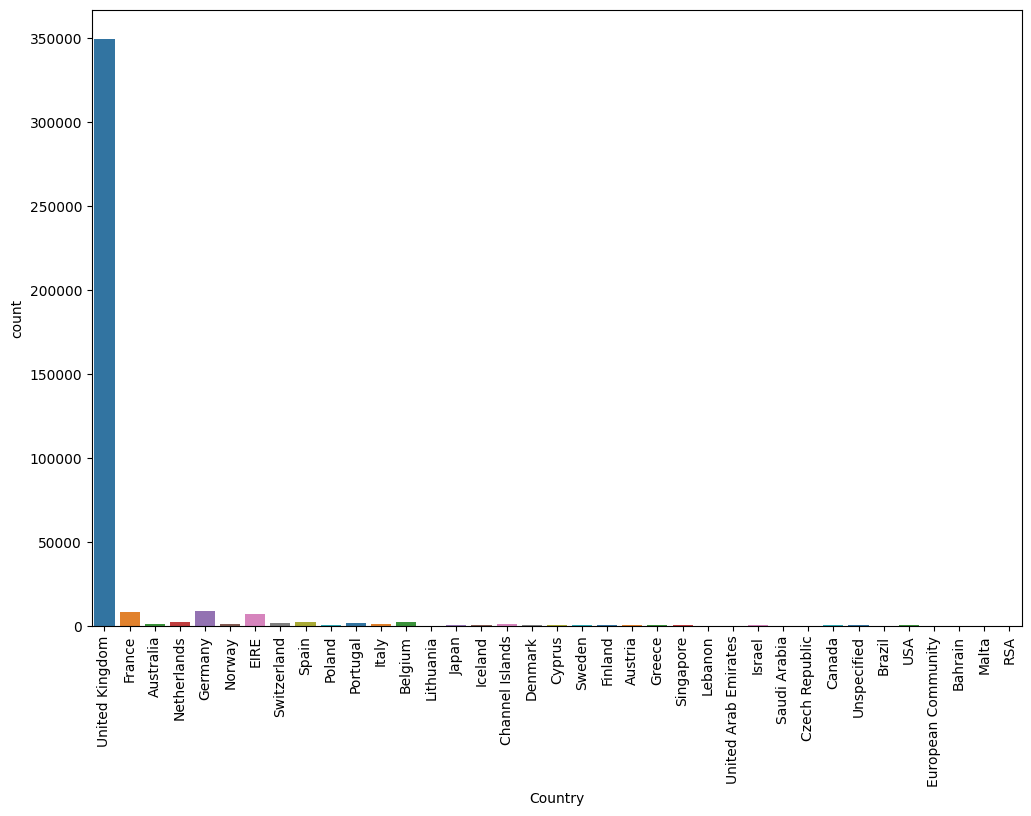

In [19]:
plt.figure(figsize=(12,8))
sns.countplot(data, x="Country", palette="tab10")
plt.tick_params(axis='x', rotation=90)
plt.show()

<div style="background-color:#e6f9e6;border-left:6px solid #4caf50;padding:15px 20px;border-radius:8px;margin:15px 0;font-size:16px;line-height:1.5;">
    <p style="font-weight:bold;margin-bottom:10px;">
        3. Data Preparation
    </p>
</div>

<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
            It is a good practice to set aside a small part of the dataset for validation purpose. Therefore, we will use data of 90% of the customers to create word2vec embeddings. Let's split the data.
         </li>
        </ul>
</div>



In [20]:
customers = data.CustomerID.unique().tolist()

# shuffle customer ID's
random.shuffle(customers)

# extract 90% of customer ID's
customers_train = [customers[i] for i in range(round(0.9*len(customers)))]

# split data into train and validation set
train_data = data[data['CustomerID'].isin(customers_train)]
validation_data = data[~data['CustomerID'].isin(customers_train)]

<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
Extract StockCodes for Each Customer (Train Set)
         </li>
        </ul>
</div>






In [21]:
purchases_train = []

for i in tqdm(customers_train):
    temp = train_data[train_data["CustomerID"] == i]["StockCode"].tolist()
    purchases_train.append(temp)
print(f'{color.DARK_BROWN} len purchases_train: {color.END}{len(purchases_train)}')

  0%|          | 0/3905 [00:00<?, ?it/s]

 len purchases_train: 3905


<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
Extract StockCodes for Each Customer (Validation Set)
         </li>
        </ul>
</div>

In [22]:
purchases_val = []

for i in tqdm(validation_data['CustomerID'].unique()):
    temp = validation_data[validation_data["CustomerID"] == i]["StockCode"].tolist()
    purchases_val.append(temp)
print(f'{color.DARK_BROWN} len purchases_val: {color.END}{len(purchases_val)}')

  0%|          | 0/434 [00:00<?, ?it/s]

 len purchases_val: 434


<div style="background-color:#e6f9e6;border-left:6px solid #4caf50;padding:15px 20px;border-radius:8px;margin:15px 0;font-size:16px;line-height:1.5;">
    <p style="font-weight:bold;margin-bottom:10px;">
        4. Build word2vec Embeddings for Products
    </p>
</div>

In [23]:
# train word2vec model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

# window (int, optional) – Maximum distance between the current and predicted word within a sentence.
# sg ({0, 1}, optional) – Training algorithm: 1 for skip-gram; otherwise CBOW.
# hs ({0, 1}, optional) – If 1, hierarchical softmax will be used for model training. If 0, and negative is non-zero,
## negative sampling will be used.
# alpha (float, optional) – The initial learning rate.
# min_alpha (float, optional) – Learning rate will linearly drop to min_alpha as training progresses.
# seed (int, optional) – Seed for the random number generator.

model.build_vocab(purchases_train, progress_per=200)

model.train(purchases_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(3485916, 3520240)

<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
Save Model
         </li>
        </ul>
</div>




In [24]:
model.save('word2vec_.model')

In [25]:
print(model)

Word2Vec<vocab=3145, vector_size=100, alpha=0.03>


<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
Now we will extract the vectors of all the words in our vocabulary and store it in one place for easy access
         </li>
        </ul>
</div>

In [26]:
words = model.wv.index_to_key
X = model.wv[words]

print(f'{color.DARK_BROWN}{X.shape}')

(3145, 100)


<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
Visualize word2vec Embeddings
         </li>
        </ul>
</div>







<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
It is always quite helpful to visualize the embeddings that you have created. Over here we have 100 dimensional embeddings. We can't even visualize 4 dimensions let alone 100. Therefore, we are going to reduce the dimensions of the product embeddings from 100 to 2 by using the UMAP algorithm, it is used for dimensionality reduction.
        </li>
        <br />
                <li>
UMAP, at its core, works very similarly to t-SNE - both use graph layout algorithms to arrange data in low-dimensional space. In the simplest sense, UMAP constructs a high dimensional graph representation of the data then optimizes a low-dimensional graph to be as structurally similar as possible. While the mathematics UMAP uses to construct the high-dimensional graph is advanced, the intuition behind them is remarkably simple.
        </li>
</div>







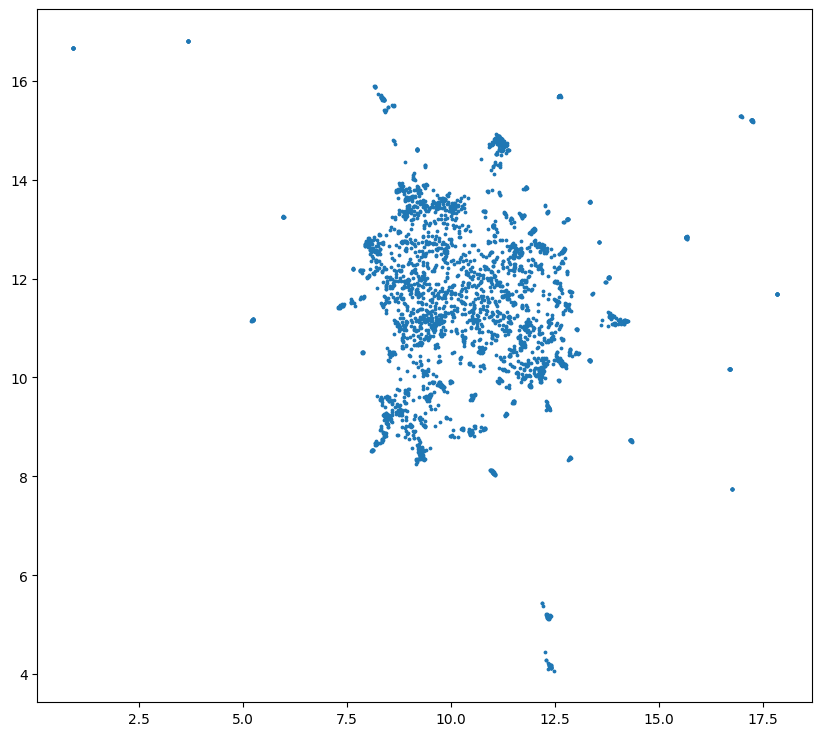

In [27]:
cluster_embedding = umap.UMAP(n_neighbors=30, min_dist=0.0,
                              n_components=2, random_state=42).fit_transform(X)

plt.figure(figsize=(10,9))
plt.scatter(cluster_embedding[:, 0], cluster_embedding[:, 1], s=3, cmap='Spectral');

<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
Every dot in this plot is a product. As you can see, there are several tiny clusters of these datapoints. These are groups of similar products.
        </li>
</div>

<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
Generate and validate recommendations
         </li>
        </ul>
</div>

<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
We are finally ready with the word2vec embeddings for every product in our online retail dataset. Now our next step is to suggest similar products for a certain product or a product's vector.
        </li>
                <li>
Let's first create a product-ID and product-description dictionary to easily map a product's description to its ID and vice versa.
        </li>
</div>

In [28]:
products = train_data[["StockCode", "Description"]]

# remove duplicates
products.drop_duplicates(inplace=True, subset='StockCode', keep="last")

# create product-ID and product-description dictionary
products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()

In [29]:
list(products_dict.items())[:10]


[('10002', ['INFLATABLE POLITICAL GLOBE ']),
 ('10080', ['GROOVY CACTUS INFLATABLE']),
 ('10120', ['DOGGY RUBBER']),
 ('10124A', ['SPOTS ON RED BOOKCOVER TAPE']),
 ('10124G', ['ARMY CAMO BOOKCOVER TAPE']),
 ('10125', ['MINI FUNKY DESIGN TAPES']),
 ('10133', ['COLOURING PENCILS BROWN TUBE']),
 ('10135', ['COLOURING PENCILS BROWN TUBE']),
 ('11001', ['ASSTD DESIGN RACING CAR PEN']),
 ('15030', ['FAN BLACK FRAME '])]

In [30]:
# test the dictionary
products_dict['84029E']

['RED WOOLLY HOTTIE WHITE HEART.']

<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
We have defined the function below. It will take a product's vector (n) as input and return top 6 similar products.
         </li>
        </ul>
</div>

In [31]:
def similar_products(v, n=10):

    ms = model.wv.similar_by_vector(v, topn=n+1)[1:]

    new_ms = []
    for j in ms:
        pair = (products_dict[j[0]][0], j[1])
        new_ms.append(pair)

    return new_ms

<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
Let's try out our function by passing the vector of the product '90019A' ('SILVER M.O.P ORBIT BRACELET')
         </li>
        </ul>
</div>



In [32]:
similar_products(model.wv['90019A'])

[('WHITE VINT ART DECO CRYSTAL NECKLAC', 0.798268735408783),
 ('PINK BOUDICCA LARGE BRACELET', 0.7921307682991028),
 ('GOLD/M.O.P PENDANT ORBIT NECKLACE', 0.7884653210639954),
 ('ANT COPPER RED BOUDICCA BRACELET', 0.7755475044250488),
 ('SILVER M.O.P ORBIT DROP EARRINGS', 0.7743895649909973),
 ('SILVER LARIAT BLACK STONE EARRINGS', 0.7653838992118835),
 ('CHUNKY SILVER NECKLACE PASTEL FLOWE', 0.7635301947593689),
 ('PINK HEART OF GLASS BRACELET', 0.7602464556694031),
 ('AMBER DROP EARRINGS W LONG BEADS', 0.7585737705230713),
 ('JADE DROP EARRINGS W FILIGREE', 0.7540979385375977)]

<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
Cool! The results are pretty relevant and match well with the input product. However, this output is based on the vector of a single product only. What if we want recommend a user products based on the multiple purchases he or she has made in the past?
        </li>
        <br />
        <li>
One simple solution is to take average of all the vectors of the products he has bought so far and use this resultant vector to find similar products. For that we will use the function below that takes in a list of product ID's and gives out a 100 dimensional vector which is mean of vectors of the products in the input list.
        </li>
</div>

In [33]:
def aggregate_vectors(products):
    product_vec = []
    
    for i in products:
        try:
            product_vec.append(model.wv[i])
        except KeyError:
            continue
        
    return np.mean(product_vec, axis=0)

<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
If you can recall, we have already created a separate list of purchase sequences for validation purpose. Now let's make use of that.
         </li>
        </ul>
</div>






In [34]:
purchases_val[0][:10]

['84879',
 '22745',
 '22748',
 '22749',
 '22310',
 '84969',
 '22623',
 '22622',
 '21754',
 '21755']

In [35]:
aggregate_vectors(purchases_val[0]).shape

(100,)

<div style="
    background-color:#DCFBFC;
    border-left:6px solid #10B8BC;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
    <p style="font-weight:bold;margin-bottom:10px;">
        Description:
    </p>
    <ul style="margin:0;padding-left:20px; text-align:justify;">
        <li>
Well, the function has returned an array of 100 dimension. It means the function is working fine. Now we can use this result to get the most similar products. Let's do it.
        </li>
</div>

In [36]:
similar_products(aggregate_vectors(purchases_val[0]))

[('SPOTTY BUNTING', 0.6662183403968811),
 ('SET OF TEA COFFEE SUGAR TINS PANTRY', 0.6622875928878784),
 ('REGENCY MILK JUG PINK ', 0.6591634750366211),
 ('PARTY BUNTING', 0.655642569065094),
 ('SET OF 3 REGENCY CAKE TINS', 0.6521010994911194),
 ('SET OF 6 SPICE TINS PANTRY DESIGN', 0.6507630348205566),
 ('JAM MAKING SET WITH JARS', 0.6499990224838257),
 ('SET OF 3 CAKE TINS PANTRY DESIGN ', 0.6474940180778503),
 ('REGENCY TEA PLATE ROSES ', 0.6330376267433167),
 ('REGENCY TEAPOT ROSES ', 0.6329241991043091)]


<div style="
    background-color:#FFFFDD;
    border-left:6px solid #FFFE00;
    padding:15px 20px;
    border-radius:8px;
    margin:15px 0;
    font-size:14px;
    line-height:1.5;
">
        <ul style="margin: 0; padding-left: 20px; text-align: justify;">
            <li>
As it turns out, our system has recommended 10 products based on the entire purchase history of a user. Moreover, if you want to get products suggestions based on the last few purchases only then also you can use the same set of functions.
         </li>
            <br />
            <li>
Below we are giving only the last 10 products purchased as input.
         </li>
        </ul>
</div>

In [37]:
similar_products(aggregate_vectors(purchases_val[0][-10:]))

[('SWEET HEART CAKE CARRIER', 0.6984084844589233),
 ('PACK OF SIX LED TEA LIGHTS', 0.6672112941741943),
 ('FOOT STOOL HOME SWEET HOME ', 0.6636531352996826),
 ('WOODEN BOX ADVENT CALENDAR ', 0.6608553528785706),
 ("3 RAFFIA RIBBONS 50'S CHRISTMAS ", 0.6586393713951111),
 ('TUSCAN VILLA BIRD FEEDER', 0.653205931186676),
 ('HEART SHAPED HOLLY WREATH', 0.6517908573150635),
 ('CARD HOLDER LOVE BIRD LARGE ', 0.6473320126533508),
 ('SILVER BELLS TABLE DECORATION', 0.6462185978889465),
 ('SET OF 6 RIBBONS VINTAGE CHRISTMAS', 0.6418896317481995)]


<div
    style="
        background-color:#e6f9e6;
        border-left:6px solid #4caf50;
        padding: 20px;
        border-radius: 8px;
        margin: 20px 0;
        font-size: 16px;
        line-height: 1.6;
    "
>
    <h3 style="text-align: center; color: #4caf50; margin-top: 0;">
       Conclusion: Building a Recommendation System with Word2Vec
    </h3>
    <ul style="padding-left: 25px; text-align: justify;">
        <li>
In this notebook, we designed and implemented an unsupervised, embedding-based recommendation system using the Word2Vec (Item2Vec) approach on the Online Retail transactional dataset.
        </li>
        <li>
By modeling products as “words” and customer purchase histories as “sentences”, we successfully transformed raw transactional data into a semantic vector space, where products that frequently co-occur in customer behavior are positioned closer together.
        </li>
        <li>
This project demonstrates that Word2Vec is a powerful and flexible foundation for building recommendation systems from transactional data.
        </li>
        <li>
Without relying on supervision or domain-specific rules, the model effectively learns meaningful product relationships directly from customer behavior.
        </li>
        <li>
The resulting system is simple, scalable, and extensible, making it a strong baseline for real-world recommender applications and an excellent starting point for more advanced hybrid or sequential models.
        </li>
    </ul>
</div>